In [1]:
# Project 1:
import pandas as pd
import numpy as np
import math
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from scipy.stats import variation
import scipy

In [3]:
os.getcwd()

'C:\\Users\\Ananth\\Downloads\\SMDM\\project'

In [2]:
mydata = pd.read_csv('Wholesale Customer.csv')

In [5]:
mydata.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
# 1.1: Creating a column in the end that containes the sum of all the values of the items:
sum_column = mydata["Fresh"] + mydata["Milk"] + mydata["Grocery"] + mydata["Frozen"] + mydata["Detergents_Paper"] + mydata["Delicatessen"]

In [5]:
mydata["Total_Sum"] = sum_column

In [9]:
mydata.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Sum
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [59]:
mydata[mydata['Channel']=='Retail'].groupby('Total_Sum').sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Total_Sum,,,,,,,
14993,97,23,2616,8118,145,3874,217
17598,296,7588,1897,5234,417,2208,254
18342,224,2790,2527,5265,5612,788,1360
20725,380,4048,5164,10391,130,813,179
20897,109,1531,8397,6981,247,2505,1236
...,...,...,...,...,...,...,...
120291,334,8565,4980,67298,131,38102,1215
150497,87,22925,73498,32114,987,20070,903
165881,62,35942,38369,59598,3254,26701,2017


In [60]:
mydata[mydata['Channel']=='Hotel'].groupby('Total_Sum').sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Total_Sum,,,,,,,
904,155,622,55,137,75,7,8
2158,98,403,254,610,774,54,63
2476,99,503,112,778,895,56,132
3485,356,190,727,2012,245,184,127
3730,132,2101,589,314,346,70,310
...,...,...,...,...,...,...,...
97820,285,68951,4411,12609,8692,751,2406
105046,126,76237,3473,7102,16538,778,918
130877,326,32717,16784,13626,60869,1272,5609


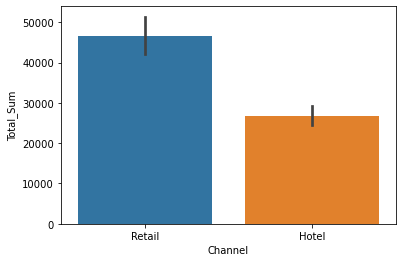

In [36]:
sns.barplot(mydata['Channel'], mydata['Total_Sum']);

In [58]:
mydata[mydata['Region']=='Other'].groupby('Total_Sum').sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Total_Sum,,,,,,,
904,155,622,55,137,75,7,8
2158,98,403,254,610,774,54,63
2476,99,503,112,778,895,56,132
3485,356,190,727,2012,245,184,127
3730,132,2101,589,314,346,70,310
...,...,...,...,...,...,...,...
165881,62,35942,38369,59598,3254,26701,2017
185683,184,36847,43950,20170,36534,239,47943
190169,182,112151,29627,18148,16745,4948,8550


In [57]:
mydata[mydata['Region']=='Lisbon'].groupby('Total_Sum').sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Total_Sum,,,,,,,
4925,204,583,685,2216,469,954,18
8434,220,4155,367,1390,2306,86,130
8933,229,1869,577,572,950,4762,203
9554,207,6373,780,950,878,288,285
9657,251,3191,1993,1799,1730,234,710
...,...,...,...,...,...,...,...
69778,217,2532,16599,36486,179,13308,674
70297,260,53205,4959,7336,3012,967,818
73243,259,56083,4563,2124,6422,730,3321


In [56]:
mydata[mydata['Region']=='Oporto'].groupby('Total_Sum').sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Total_Sum,,,,,,,
4129,328,542,899,1664,414,88,522
4196,300,444,879,2060,264,290,259
9373,321,1774,3696,2280,514,275,834
12174,327,4414,1610,1431,3498,387,834
12343,309,6987,1020,3007,416,257,656
13820,318,1182,3088,6114,978,821,1637
14524,317,7127,1375,2201,2679,83,1059
17540,330,5113,1486,4583,5127,492,739
17598,296,7588,1897,5234,417,2208,254


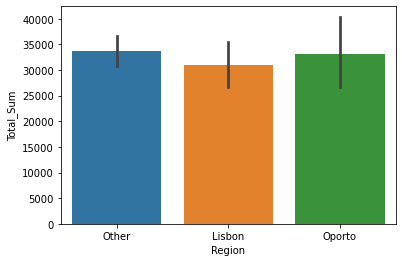

In [35]:
sns.barplot(mydata['Region'], mydata['Total_Sum']);

In [ ]:
# The region: Other spends more with 199891, region: Lisbon spends least with 107155 and the region: Oporto spends 130877
# The channel: Retail spends more with 199891 and the channel: Hotel spends less with 190169

In [6]:
# 1.2 
mydata.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [19]:
# we will first find out the skew value for the entire data:
skewvalue = mydata.skew(axis = 1)

In [31]:
# we sort the skew value in the descending order between the following values as 
# this is the region of separation between the positive and negative values:
skewvalue.sort_values(ascending = False).iloc[425:440]

166    0.102371
365    0.067290
57     0.048095
188    0.023640
167    0.014577
411    0.005149
290   -0.026671
292   -0.096949
100   -0.106911
179   -0.117205
207   -0.217250
391   -0.287837
62    -0.439177
183   -0.575900
2     -0.590794
dtype: float64

In [ ]:
#The money spent on Fresh Milk is the maximum at 112151.
# The Standard Deviation is minimum for Delicatessen with 2820.105937
# The minimum amount has been spent on Fresh, Grocery, Detergents_Paper, Delicatessen with 3.
# The highest IQR (75th percentile - 25th percentile) is for the product: Fresh with (16933.7500 - 3127.7500) = 13806
# The lowest IQR is for the product: Delicatessen with (1820.2500 - 408.2500) = 1412
# most of the values in skewness are greater than 0 which means that there is more weight in the Left tail of the distribution.

In [49]:
#1.3:

In [3]:
# using the describe function to get the standard deviation and mean for the product Fresh
mydata['Fresh'].describe()

count       440.000000
mean      12000.297727
std       12647.328865
min           3.000000
25%        3127.750000
50%        8504.000000
75%       16933.750000
max      112151.000000
Name: Fresh, dtype: float64

In [11]:
# Coefficient of Variation for the product: Fresh is defined by the formula: coeff_var_fresh = Standard deviation/Mean)*100
coeff_var_fresh =(12647.328865/12000.297727)*100
coeff_var_fresh

105.39179237648592

In [6]:
# using the describe function to get the standard deviation and mean for the product Milk
mydata['Milk'].describe()

count      440.000000
mean      5796.265909
std       7380.377175
min         55.000000
25%       1533.000000
50%       3627.000000
75%       7190.250000
max      73498.000000
Name: Milk, dtype: float64

In [10]:
#Coefficient of Variation for the product: Milk is defined by the formula: coeff_var_Milk = (Standard deviation/Mean)*100
coeff_var_Milk = (7380.377175/5796.265909)*100
coeff_var_Milk

127.32985841005522

In [9]:
# using the describe function to get the standard deviation and mean for the product Grocery
mydata['Grocery'].describe()

count      440.000000
mean      7951.277273
std       9503.162829
min          3.000000
25%       2153.000000
50%       4755.500000
75%      10655.750000
max      92780.000000
Name: Grocery, dtype: float64

In [12]:
# Coefficient of Variation for the product: Grocery is defined by the formula: coeff_var_Grocery = (Standard deviation/Mean)*100
coeff_var_Grocery = (9503.162829/7951.277273)*100
coeff_var_Grocery

119.51743729613995

In [13]:
# using the describe function to get the standard deviation and mean for the product Frozen
mydata['Frozen'].describe()

count      440.000000
mean      3071.931818
std       4854.673333
min         25.000000
25%        742.250000
50%       1526.000000
75%       3554.250000
max      60869.000000
Name: Frozen, dtype: float64

In [14]:
# Coefficient of Variation for the product: Frozen is defined by the formula: coeff_var_Frozen = (Standard deviation/Mean)*100
coeff_var_Frozen = (4854.673333/3071.931818)*100
coeff_var_Frozen

158.03323838615222

In [15]:
# using the describe function to get the standard deviation and mean for the product Detergents_Paper
mydata['Detergents_Paper'].describe()

count      440.000000
mean      2881.493182
std       4767.854448
min          3.000000
25%        256.750000
50%        816.500000
75%       3922.000000
max      40827.000000
Name: Detergents_Paper, dtype: float64

In [16]:
# Coefficient of Variation for the product: Detergents_Paper is defined by the formula: coeff_var_Detergents_Paper = (Standard deviation/Mean)*100
coeff_var_Detergents_Paper = (4767.854448/2881.493182)*100
coeff_var_Detergents_Paper

165.46471384293562

In [17]:
# using the describe function to get the standard deviation and mean for the product Delicatessen
mydata['Delicatessen'].describe()

count      440.000000
mean      1524.870455
std       2820.105937
min          3.000000
25%        408.250000
50%        965.500000
75%       1820.250000
max      47943.000000
Name: Delicatessen, dtype: float64

In [18]:
# Coefficient of Variation for the product: Delicatessen is defined by the formula: coeff_var_Delicatessen = (Standard deviation/Mean)*100
coeff_var_Delicatessen = (2820.105937/1524.870455)*100
coeff_var_Delicatessen

184.9406897322304

In [19]:
# Delicatessen shows the most inconsistent behaviour with coefficient of variation = 184.9406897322304
# Fresh shows the least inconsistent behaviour with coefficient of variation = 105.39179237648592

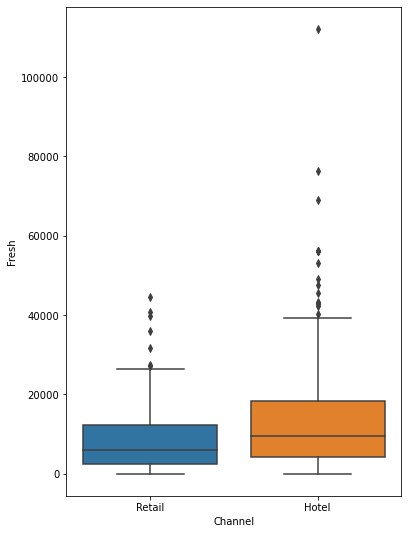

In [34]:
# 1.4: 
fig_dim = (6, 9)
fig, ax = plt.subplots(figsize = fig_dim)
sns.boxplot(x = "Channel", y = "Fresh", ax=ax, data=mydata);

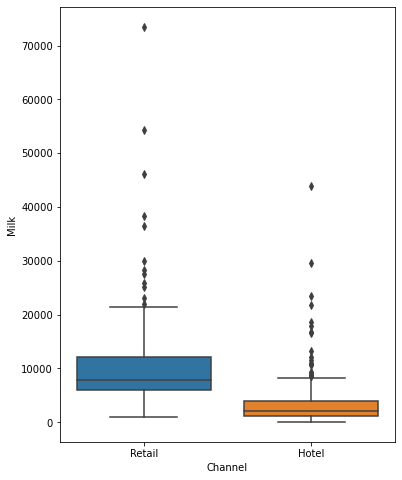

In [28]:
fig_dim = (6, 8)
fig, ax = plt.subplots(figsize = fig_dim)
sns.boxplot(x = "Channel", y = "Milk", ax=ax, data=mydata);

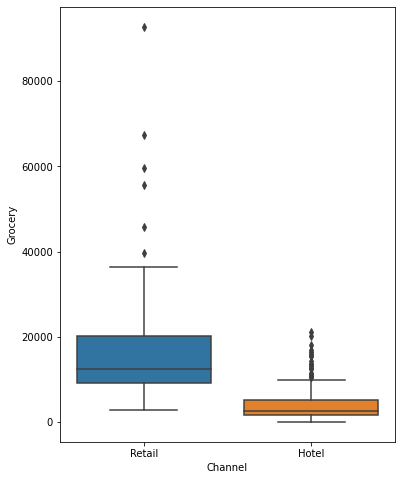

In [29]:
fig_dim = (6, 8)
fig, ax = plt.subplots(figsize = fig_dim)
sns.boxplot(x = "Channel", y = "Grocery", ax=ax, data=mydata);

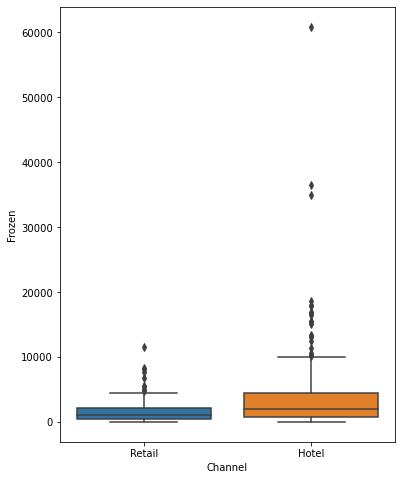

In [30]:
fig_dim = (6, 8)
fig, ax = plt.subplots(figsize = fig_dim)
sns.boxplot(x = "Channel", y = "Frozen", ax=ax, data=mydata);

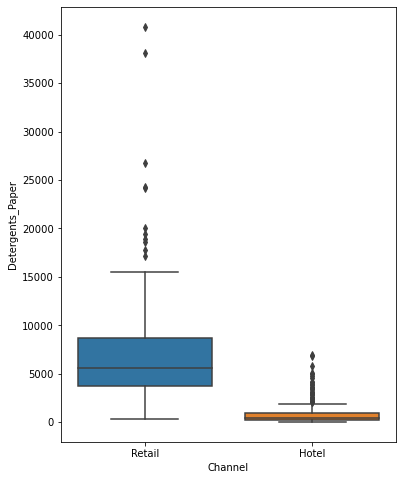

In [31]:
fig_dim = (6, 8)
fig, ax = plt.subplots(figsize = fig_dim)
sns.boxplot(x = "Channel", y = "Detergents_Paper", ax=ax, data=mydata);

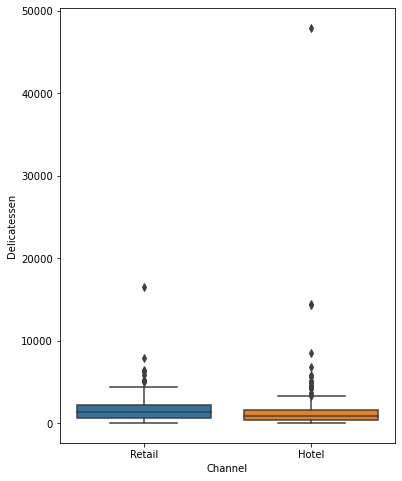

In [33]:
fig_dim = (6, 8)
fig, ax = plt.subplots(figsize=fig_dim)
sns.boxplot(x = "Channel", y = "Delicatessen", ax=ax, data=mydata);

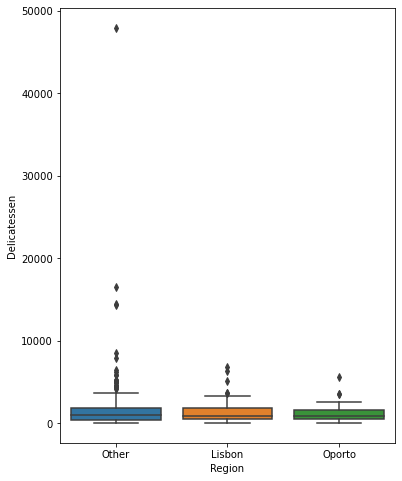

In [6]:
fig_dim = (6, 8)
fig, ax = plt.subplots(figsize=fig_dim)
sns.boxplot(x = "Region", y = "Delicatessen", ax=ax, data=mydata);

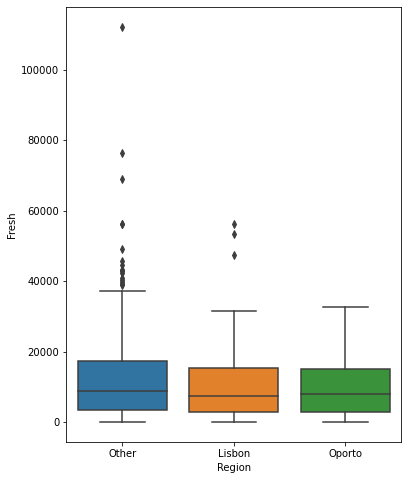

In [8]:
fig_dim = (6, 8)
fig, ax = plt.subplots(figsize=fig_dim)
sns.boxplot(x = "Region", y = "Fresh", ax=ax, data=mydata);

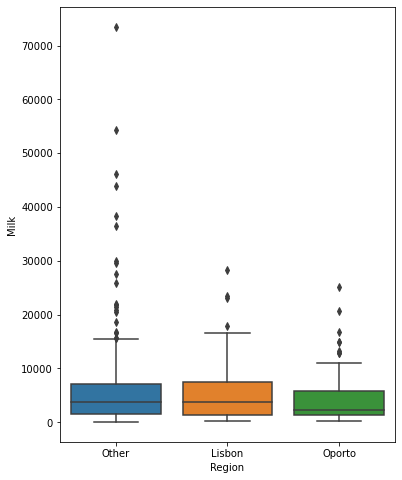

In [9]:
fig_dim = (6, 8)
fig, ax = plt.subplots(figsize=fig_dim)
sns.boxplot(x = "Region", y = "Milk", ax=ax, data=mydata);

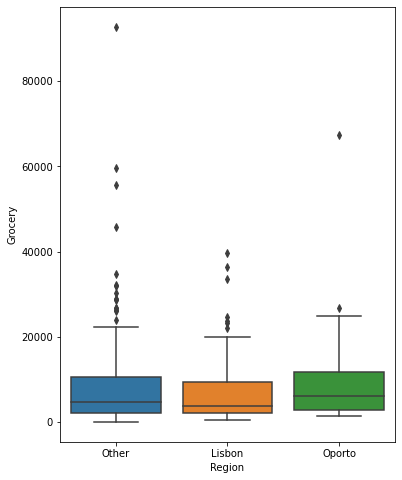

In [10]:
fig_dim = (6, 8)
fig, ax = plt.subplots(figsize=fig_dim)
sns.boxplot(x = "Region", y = "Grocery", ax=ax, data=mydata);

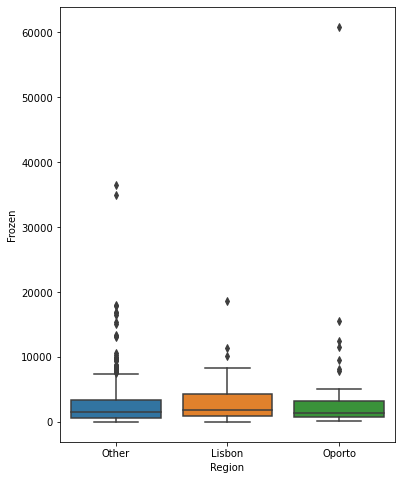

In [11]:
fig_dim = (6, 8)
fig, ax = plt.subplots(figsize=fig_dim)
sns.boxplot(x = "Region", y = "Frozen", ax=ax, data=mydata);

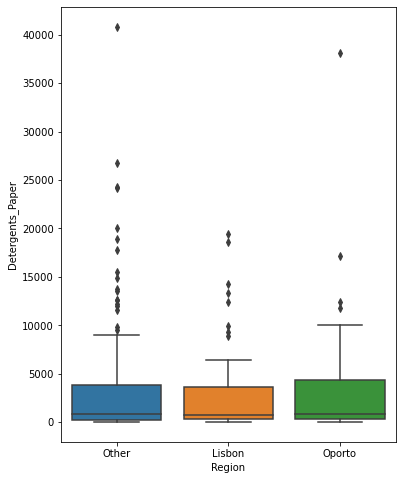

In [12]:
fig_dim = (6, 8)
fig, ax = plt.subplots(figsize=fig_dim)
sns.boxplot(x = "Region", y = "Detergents_Paper", ax=ax, data=mydata);

In [ ]:
# As we Can see, there are many outliers in the data for each product when plotted against Channel and Region

In [13]:
#1.5: Creating a total row at the bottom
mydata.append(mydata.sum().rename('Total'))

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Sum
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834
439,440,Hotel,Other,2787,1698,2510,65,477,52,7589


In [21]:
print(mydata[mydata.Total_Sum == mydata.Total_Sum.max()])

    Buyer/Spender Channel Region  Fresh   Milk  Grocery  Frozen  \
85             86  Retail  Other  16117  46197    92780    1026   

    Detergents_Paper  Delicatessen  Total_Sum  
85             40827          2944     199891  


In [ ]:
# The Buyer/Spender: 86 has spent the maximum with the majority towards the product: Fresh.
#Since the data has a lot of outliers, it is wise to consider the median or the 50th percentile rather than the mean to compute the average.


In [22]:
print(mydata[mydata.Milk == mydata.Milk.max()])

    Buyer/Spender Channel Region  Fresh   Milk  Grocery  Frozen  \
86             87  Retail  Other  22925  73498    32114     987   

    Detergents_Paper  Delicatessen  Total_Sum  
86             20070           903     150497  


In [ ]:
# The Buyer/Spender # 87 has spent the maximum on Milk with 73498.

In [23]:
print(mydata[mydata.Grocery == mydata.Grocery.max()])

    Buyer/Spender Channel Region  Fresh   Milk  Grocery  Frozen  \
85             86  Retail  Other  16117  46197    92780    1026   

    Detergents_Paper  Delicatessen  Total_Sum  
85             40827          2944     199891  


In [24]:
# The Buyer/Spender # 86 has spent the maximum on Grocery with 92780.

In [25]:
print(mydata[mydata.Frozen == mydata.Frozen.max()])

     Buyer/Spender Channel  Region  Fresh   Milk  Grocery  Frozen  \
325            326   Hotel  Oporto  32717  16784    13626   60869   

     Detergents_Paper  Delicatessen  Total_Sum  
325              1272          5609     130877  


In [26]:
# The Buyer / Spender # 326 has spent the maximum on Frozen with 60869.

In [27]:
print(mydata[mydata.Fresh == mydata.Fresh.max()])

     Buyer/Spender Channel Region   Fresh   Milk  Grocery  Frozen  \
181            182   Hotel  Other  112151  29627    18148   16745   

     Detergents_Paper  Delicatessen  Total_Sum  
181              4948          8550     190169  


In [28]:
# The Buyer/Spender # 182 has spent the maximum on Fresh with 112151.

In [29]:
print(mydata[mydata.Detergents_Paper == mydata.Detergents_Paper.max()])

    Buyer/Spender Channel Region  Fresh   Milk  Grocery  Frozen  \
85             86  Retail  Other  16117  46197    92780    1026   

    Detergents_Paper  Delicatessen  Total_Sum  
85             40827          2944     199891  


In [30]:
# The Buyer/ Spender # 86 has spent the maximum on Detergents_Paper with 40827.

In [31]:
print(mydata[mydata.Delicatessen == mydata.Delicatessen.max()])

     Buyer/Spender Channel Region  Fresh   Milk  Grocery  Frozen  \
183            184   Hotel  Other  36847  43950    20170   36534   

     Detergents_Paper  Delicatessen  Total_Sum  
183               239         47943     185683  


In [33]:
print(mydata[mydata.Total_Sum == mydata.Total_Sum].head(10))

   Buyer/Spender Channel Region  Fresh   Milk  Grocery  Frozen  \
0              1  Retail  Other  12669   9656     7561     214   
1              2  Retail  Other   7057   9810     9568    1762   
2              3  Retail  Other   6353   8808     7684    2405   
3              4   Hotel  Other  13265   1196     4221    6404   
4              5  Retail  Other  22615   5410     7198    3915   
5              6  Retail  Other   9413   8259     5126     666   
6              7  Retail  Other  12126   3199     6975     480   
7              8  Retail  Other   7579   4956     9426    1669   
8              9   Hotel  Other   5963   3648     6192     425   
9             10  Retail  Other   6006  11093    18881    1159   

   Detergents_Paper  Delicatessen  Total_Sum  
0              2674          1338      34112  
1              3293          1776      33266  
2              3516          7844      36610  
3               507          1788      27381  
4              1777          5185     

In [ ]:
# The Buyer/Spender # 184 has spent the maximum on Delicatessen with 47943.
# More focus should be placed on the Buyer/Spender#: 86, 87, 326, 182, 184 as they have purchased more. 
# More discounts/offers need to be provided to them so that we can drive them to purchase more.


In [1]:
# Project 2: 
import pandas as pd
import numpy as np
import math
import scipy
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

In [2]:
df = pd.read_csv('Survey-1.csv')

In [3]:
df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [4]:
# 2.1.1:
df_crosstab1 = pd.crosstab(df['Gender'], df['Major'], margins = False)
print(df_crosstab1)

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   

Major   Management  Other  Retailing/Marketing  Undecided  
Gender                                                     
Female           4      3                    9          0  
Male             6      4                    5          3  


In [5]:
# 2.1.2:
df_crosstab2 = pd.crosstab(df['Gender'], df['Grad Intention'], margins = False)
print(df_crosstab2)

Grad Intention  No  Undecided  Yes
Gender                            
Female           9         13   11
Male             3          9   17


In [6]:
#2.1.3:
df_crosstab3 = pd.crosstab(df['Gender'], df['Employment'], margins = False)
print(df_crosstab3)

Employment  Full-Time  Part-Time  Unemployed
Gender                                      
Female              3         24           6
Male                7         19           3


In [7]:
#2.1.4:
df_crosstab4 = pd.crosstab(df['Gender'], df['Computer'], margins = False)
print(df_crosstab4)

Computer  Desktop  Laptop  Tablet
Gender                           
Female          2      29       2
Male            3      26       0


In [8]:
#2.2.1:
df_crosstab5 = pd.crosstab([df.Gender, df.Major], df.Employment, margins = False)
print(df_crosstab5)

Employment                     Full-Time  Part-Time  Unemployed
Gender Major                                                   
Female Accounting                      0          3           0
       CIS                             0          3           0
       Economics/Finance               1          5           1
       International Business          0          4           0
       Management                      0          1           3
       Other                           2          1           0
       Retailing/Marketing             0          7           2
Male   Accounting                      1          2           1
       CIS                             1          0           0
       Economics/Finance               1          3           0
       International Business          0          2           0
       Management                      1          5           0
       Other                           0          3           1
       Retailing/Marketing             1

In [9]:
df['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [10]:
df_crosstab5.sum()

Employment
Full-Time     10
Part-Time     43
Unemployed     9
dtype: int64

In [11]:
# Probability of a randomly selected CMSU student is a male = male students / Total number of students
male_students = 29
Total_number_of_students = 62
prob_male = (male_students/Total_number_of_students)*100
print("The probability of a randomly selected CMSU student is a male is ", prob_male, "%")

The probability of a randomly selected CMSU student is a male is  46.774193548387096 %


In [12]:
#2.2.2:
female_students = 33
prob_female = (female_students/Total_number_of_students)*100
print("The probability of a randomly selected CMSU student is a female is ", prob_female, "%")

The probability of a randomly selected CMSU student is a female is  53.2258064516129 %


In [13]:
#2.3.1:
sum_total = df_crosstab5['Full-Time'] + df_crosstab5['Part-Time'] + df_crosstab5['Unemployed']
df_crosstab5['Total_Sum'] = sum_total
df_crosstab5.loc['Total'] = df_crosstab5.sum()
df_crosstab5

Employment,Full-Time,Part-Time,Unemployed,Total_Sum
"(Female, Accounting)",0,3,0,3
"(Female, CIS)",0,3,0,3
"(Female, Economics/Finance)",1,5,1,7
"(Female, International Business)",0,4,0,4
"(Female, Management)",0,1,3,4
"(Female, Other)",2,1,0,3
"(Female, Retailing/Marketing)",0,7,2,9
"(Male, Accounting)",1,2,1,4
"(Male, CIS)",1,0,0,1
"(Male, Economics/Finance)",1,3,0,4


In [14]:
# P(Accounting|Male) = Number of males in accounting / Total Number of males
accounting_male = 4
male_students = 29
cond_prob_accounting_male = (accounting_male/male_students)*100
print("The conditional probability of Accounting among the male students is ", cond_prob_accounting_male, "%")

The conditional probability of Accounting among the male students is  13.793103448275861 %


In [15]:
cis_male = 1
cond_prob_cis_male = (cis_male/male_students)*100
print("The conditional probability of CIS among the male students is ", cond_prob_cis_male, "%")

The conditional probability of CIS among the male students is  3.4482758620689653 %


In [16]:
economics_finance_male = 4
cond_prob_economicsfinance_male = (economics_finance_male/male_students)*100
print("The conditional probability of Economics/Finance among the male students is ", cond_prob_economicsfinance_male, "%")

The conditional probability of Economics/Finance among the male students is  13.793103448275861 %


In [17]:
international_business_male = 2
cond_prob_internationalbusiness_male = (international_business_male/male_students)*100
print("The conditional probability of International Business among the male students is ", cond_prob_internationalbusiness_male, "%")

The conditional probability of International Business among the male students is  6.896551724137931 %


In [18]:
management_male = 6
cond_prob_management_male = (management_male/male_students)*100
print("The conditional probability of Management among the male students is ", cond_prob_management_male, "%")

The conditional probability of Management among the male students is  20.689655172413794 %


In [19]:
other_male = 4
cond_prob_other_male = (other_male/male_students)*100
print("The conditional probability of Other among male students is ", cond_prob_other_male, "%")

The conditional probability of Other among male students is  13.793103448275861 %


In [20]:
retailing_marketing_male = 5
cond_prob_retailing_marketing_male = (retailing_marketing_male/male_students)*100
print("The conditional probability of Retailing/Marketing among male students is ", cond_prob_retailing_marketing_male, "%")

The conditional probability of Retailing/Marketing among male students is  17.24137931034483 %


In [21]:
undecided_male = 3
cond_prob_undecided_male = (undecided_male/male_students)*100
print("The conditional probability of undecided among male students is ", cond_prob_undecided_male, "%")

The conditional probability of undecided among male students is  10.344827586206897 %


In [22]:
#2.3.2:
accounting_female = 3
female_students = 33
cond_prob_accounting_female = (accounting_female/female_students)*100
print("The conditional probability of Accounting among the female students is ", cond_prob_accounting_female, "%")

The conditional probability of Accounting among the female students is  9.090909090909092 %


In [23]:
cis_female = 1
cond_prob_cis_female = (cis_female/female_students)*100
print("The conditional probability of CIS among the female students is ", cond_prob_cis_female, "%")

The conditional probability of CIS among the female students is  3.0303030303030303 %


In [24]:
economics_finance_female = 4
cond_prob_economicsfinance_female = (economics_finance_female/female_students)*100
print("The conditional probability of Economics/Finance among the female students is ", cond_prob_economicsfinance_female, "%")

The conditional probability of Economics/Finance among the female students is  12.121212121212121 %


In [25]:
international_business_female = 2
cond_prob_internationalbusiness_female = (international_business_female/female_students)*100
print("The conditional probability of International Business among the female students is ", cond_prob_internationalbusiness_female, "%")

The conditional probability of International Business among the female students is  6.0606060606060606 %


In [26]:
management_female = 6
cond_prob_management_female = (management_female/female_students)*100
print("The conditional probability of Management among the female students is ", cond_prob_management_female, "%")

The conditional probability of Management among the female students is  18.181818181818183 %


In [27]:
other_female = 4
cond_prob_other_female = (other_female/female_students)*100
print("The conditional probability of Other among female students is ", cond_prob_other_female, "%")

The conditional probability of Other among female students is  12.121212121212121 %


In [28]:
retailing_marketing_female = 5
cond_prob_retailing_marketing_female = (retailing_marketing_female/female_students)*100
print("The conditional probability of Retailing/Marketing among female students is ", cond_prob_retailing_marketing_female, "%")

The conditional probability of Retailing/Marketing among female students is  15.151515151515152 %


In [29]:
undecided_female = 3
cond_prob_undecided_female = (undecided_female/female_students)*100
print("The conditional probability of undecided among female students is ", cond_prob_undecided_female, "%")

The conditional probability of undecided among female students is  9.090909090909092 %


In [30]:
#2.4.a:
crosstab_6 = pd.crosstab(df['Gender'], df['Grad Intention'], margins = False)
crosstab_6
crosstab_6['Total'] = crosstab_6.sum(axis = 1)
crosstab_6.loc['Total'] = crosstab_6.sum()
crosstab_6

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


In [31]:
# Probability of all the males P(A) = 29/62 = 0.467
#  Probability of a student who intends to graduate P(B) = 28/62 = 0.4516
# Probability of a male student given that he intends to graduate = P(A|B) = 17/28 = 0.607
# Now as per the formula, P(A and B) = P(B) * P(A|B)
# P(A and B) = 0.4516 * 0.607 = 0.27 or 27% probability
# The Probability that a randomly chosen student is a male and intends to graduate is 0.27.

In [32]:
# 2.4.b: 
crosstab_6b = pd.crosstab(df['Gender'], df['Computer'], margins = False)
crosstab_6b['Total'] = crosstab_6b.sum(axis = 1)
crosstab_6b.loc['Total'] = crosstab_6b.sum()
crosstab_6b
# Probability of a female student P(A) = 33/62 = 0.53
# Probability of having a laptop = 55/62 = 0.88
# Probability of not having a laptop P(B) = (1 - 0.88) = 0.11
# Now as per the formula, P(A and B) = P(B) * P(A|B)
# P(A|B) = 0.57
# P(A and B) = 0.57 * 0.11 = 0.06
# Probability that a randomly selected student is a female and does not have a laptop is 0.06

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


In [33]:
# 2.5.1:
# Let, P(A) denote the probability of being a male and let P(B) denote the probability of having a full time employment.
# Here, P(A or B) is asked where the events are non-mutually exclusive, so P(A or B) = P(A) + P(B) - P(A and B)
# From df_crosstab5, we see that P(A) = 29/62 = 0.467
# P(B) = 10/62 = 0.161
# P(A and B) = 7/62 = 0.112
# P(A or B) = 0.467 + 0.161 - 0.112 = 0.516
# Hence the probability that a randomly selected student is either a male or has a full time employment is 0.51

In [34]:
#2.5.2:
extract1 = df[df['Major'].isin(['International Business','Management'])]
extract1

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400
12,13,Male,22,Senior,International Business,Undecided,3.4,Part-Time,40.0,2,3,400,Desktop,45
13,14,Male,22,Senior,International Business,Undecided,3.1,Part-Time,40.0,1,3,400,Laptop,150
14,15,Male,21,Senior,Management,Yes,3.2,Part-Time,54.0,3,4,600,Laptop,400
15,16,Male,24,Senior,Management,Undecided,3.4,Part-Time,45.0,4,4,500,Laptop,175
19,20,Female,20,Junior,Management,Undecided,3.2,Unemployed,60.0,2,6,300,Laptop,350
25,26,Male,24,Senior,Management,Yes,3.3,Full-Time,60.0,0,1,300,Laptop,40
27,28,Female,20,Junior,International Business,Yes,2.9,Part-Time,50.0,3,1,900,Laptop,100
36,37,Male,21,Senior,Management,Yes,3.1,Part-Time,40.0,1,4,500,Laptop,100


In [35]:
crosstab_7 = pd.crosstab(extract1['Gender'],extract1['Major'], margins = False)
crosstab_7['Total'] = crosstab_7.sum(axis = 1)
crosstab_7.loc['Total'] = crosstab_7.sum()
crosstab_7

Major,International Business,Management,Total
Gender,,,
Female,4,4,8
Male,2,6,8
Total,6,10,16


In [36]:
# Probability that a randomly selected female will be majoring in International Business OR Management:
# P(International business or Management | Female) = 8 / 33 = 0.24
# Probability that a randomly selected female will be majoring in International Business OR Management is 0.24

In [37]:
# 2.6 :
extract2 = df[df['Grad Intention'].isin(['Yes','No'])]
extract2

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400
10,11,Female,23,Senior,Economics/Finance,Yes,2.8,Full-Time,50.0,2,5,400,Laptop,200
11,12,Male,21,Senior,Undecided,No,3.5,Full-Time,37.0,2,3,500,Laptop,100
14,15,Male,21,Senior,Management,Yes,3.2,Part-Time,54.0,3,4,600,Laptop,400
18,19,Male,19,Junior,Economics/Finance,Yes,3.5,Part-Time,52.0,2,5,500,Laptop,300
23,24,Male,22,Senior,Undecided,Yes,2.6,Full-Time,45.0,1,5,400,Laptop,600


In [38]:
crosstab8 = pd.crosstab(extract2['Gender'], extract2['Grad Intention'], margins = False)
crosstab8['Total'] = crosstab8.sum(axis = 1)
crosstab8.loc['Total'] = crosstab8.sum()
crosstab8

Grad Intention,No,Yes,Total
Gender,,,
Female,9,11,20
Male,3,17,20
Total,12,28,40


In [39]:
# Given that P(A) = Being a female = 20/40 = 0.5
# Given that P(B) = Grad intention Yes = 28/40 = 0.7
# If two events are independent, P(Female and Yes) = P(A) * P(B) = 0.50 * 0.7 = 0.37
# To check if two events are independent if P(A|B) = P(A) and P(B|A) = P(B):
# P(A|B) = 11/28 = 0.39
# P(A) = 0.5 is not equal to P(A|B), i.e: not equal to 0.39
# P(B|A) = 11/20 = 0.55
# P(B) = 0.7
# So, P(B|A) = 0.55 which is not equal to P(B) = 0.7
# So the two events are not independent. So for dependent events, P(A and B) = P(A) * P(B|A)
# P(B|A) = 11/20 = 0.55 
# P(A and B) = 0.55* 0.5 = 0.275

In [40]:
# 2.7.1:
df2 = pd.DataFrame(df, columns = ['Gender','GPA', 'Salary'])
df2

,Gender,GPA,Salary
0,Female,2.9,50.0
1,Male,3.6,25.0
2,Male,2.5,45.0
3,Male,2.5,40.0
4,Male,2.8,40.0
...,...,...,...
57,Female,2.4,40.0
58,Female,2.9,40.0
59,Female,2.5,55.0
60,Female,3.5,30.0


In [41]:
df2_filtered = df2[df2['GPA']<3]
df2_filtered['Total'] = df2_filtered.sum(axis = 1)
df2_filtered.loc['Total'] = df2_filtered.sum()
df2_filtered

<ipython-input-41-78f865b9d0f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['Total'] = df2_filtered.sum(axis = 1)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Gender,GPA,Salary,Total
0,Female,2.9,50.0,52.9
2,Male,2.5,45.0,47.5
3,Male,2.5,40.0,42.5
4,Male,2.8,40.0,42.8
5,Female,2.3,78.0,80.3
10,Female,2.8,50.0,52.8
23,Male,2.6,45.0,47.6
27,Female,2.9,50.0,52.9
31,Male,2.9,47.0,49.9
33,Male,2.6,40.0,42.6


In [42]:
df2_filtered.count()

Gender    18
GPA       18
Salary    18
Total     18
dtype: int64

In [43]:
# Probability of a student who is randomly chosen, that his GPA is less than 3 = Number of students with GPA less than 3/ Total number of students
# = 18/62 = 0.2903

In [44]:
#2.7.2.a:
df3 = df2[df2['Salary']>=50]
df3['Total'] = df3.sum(axis = 1)
df3.loc['Total'] = df3.sum()
df3

<ipython-input-44-bdccc457551a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Total'] = df3.sum(axis = 1)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Gender,GPA,Salary,Total
0,Female,2.9,50.0,52.9
5,Female,2.3,78.0,80.3
6,Female,3.0,50.0,53.0
7,Female,3.1,80.0,83.1
10,Female,2.8,50.0,52.8
14,Male,3.2,54.0,57.2
16,Female,3.7,55.0,58.7
17,Male,3.1,55.0,58.1
18,Male,3.5,52.0,55.5
19,Female,3.2,60.0,63.2


In [45]:
# 2.7.2.a:
# Probability that a randomly chosen male earns 50 or more = Number of male earning 50 or more/ Total number of male
male50 = df3[df3['Gender']=='Male']
male50.count()

Gender    14
GPA       14
Salary    14
Total     14
dtype: int64

In [46]:
# Number of Male earning 50 or more = 14
# Total number of Male = 29
# Probability that a randomly chosen male earns 50 or more = 14/29 = 0.48

In [47]:
#2.7.2.b:
female50 = df3[df3['Gender']=='Female']
female50.count()

Gender    18
GPA       18
Salary    18
Total     18
dtype: int64

In [48]:
# Number of Female earning 50 or more = 18
# Total number of Female = 33
# Probability that a randomly chosen female earns 50 or more = 18/33 = 0.54

In [49]:
#2.8:
df4 = pd.DataFrame(df, columns = ['GPA', 'Salary', 'Spending', 'Text Messages'])
df4

,GPA,Salary,Spending,Text Messages
0,2.9,50.0,350,200
1,3.6,25.0,360,50
2,2.5,45.0,600,200
3,2.5,40.0,600,250
4,2.8,40.0,500,100
...,...,...,...,...
57,2.4,40.0,1000,10
58,2.9,40.0,350,250
59,2.5,55.0,500,500
60,3.5,30.0,490,50


In [50]:
df4.describe()

,GPA,Salary,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000
mean,3.129032,48.548387,482.016129,246.209677
std,0.377388,12.080912,221.953805,214.465950
min,2.300000,25.000000,100.000000,0.000000
25%,2.900000,40.000000,312.500000,100.000000
50%,3.150000,50.000000,500.000000,200.000000
75%,3.400000,55.000000,600.000000,300.000000
max,3.900000,80.000000,1400.000000,900.000000


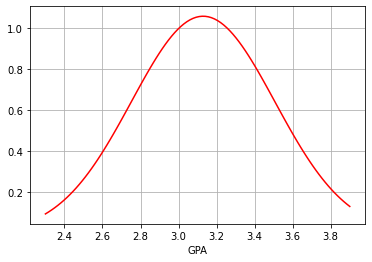

In [65]:
# Here, x_min and x_max denote the minimum and maximum values of the GPA variable.
# mean and std denote the mean and standard deviation of the GPA variable.
x_min = 2.30
x_max = 3.90
mean = 3.129
std = 0.377
x = np.linspace(x_min, x_max, 100)
y = scipy.stats.norm.pdf(x, mean, std)
plt.plot(x,y, color = 'Red')
plt.xlabel('GPA')
plt.grid()
plt.show()

In [52]:
# This is to show that the GPA follows a Normal distribution
# This shows that 68% of data fall between +/- 0.37 from the mean, 95% of data fall between +/- 0.74 from the mean and 99.7% of all the data fall between +/- 1.11 from the mean.
# The data is perfectly symmetrical distribution for the GPA variable.

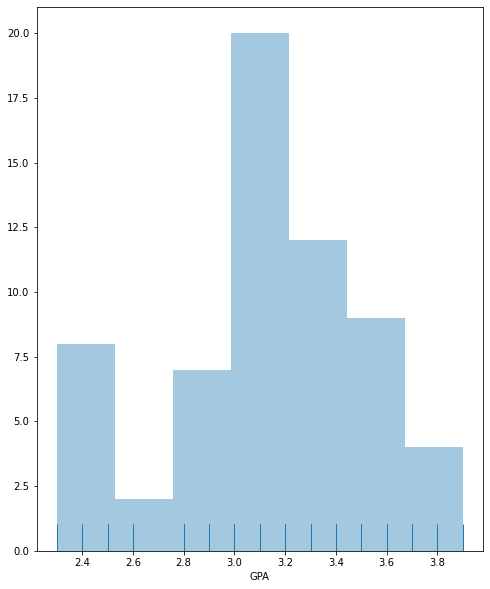

In [53]:
ax = plt.subplots(figsize = (8,10))
sns.distplot(df4['GPA'], kde = False, rug = True);

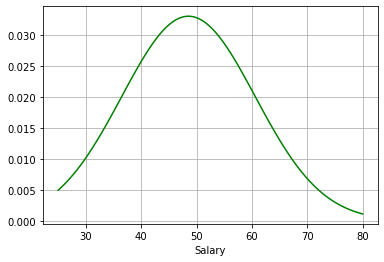

In [66]:
# Here, x1_min and x1_max denote the minimum and maximum values of the Salary variable.
# mean1 and std1 denote the mean and standard deviation of the Salary variable.
x1_min = 25
x1_max = 80
mean1 = 48.548
std1 = 12.08
x = np.linspace(x1_min, x1_max, 100)
y = scipy.stats.norm.pdf(x, mean1, std1)
plt.plot(x,y, color = 'Green')
plt.xlabel('Salary')
plt.grid()
plt.show()

In [55]:
# As we can see, the Salary is approximately showing a Normal distribution
# This shows that 68% of data fall between +/- 12.08 from the mean, 95% of data fall between +/- 24.16 from the mean and 99.7% of all the data fall between +/- 36.24 from the mean.
# The distribution for the Salary is a slightly right skewed or positive skewed distribution.

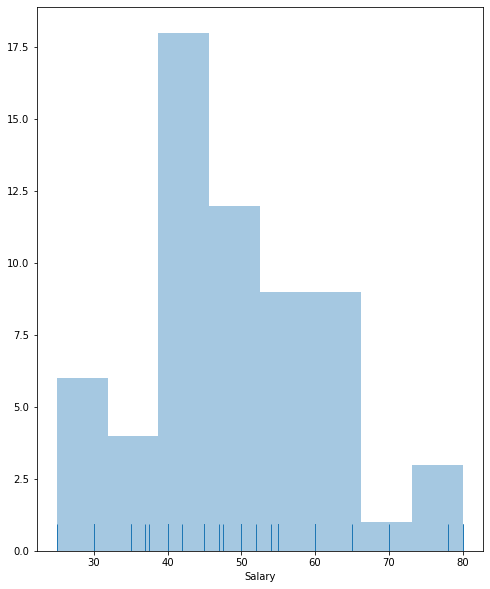

In [56]:
ax = plt.subplots(figsize = (8,10))
sns.distplot(df4['Salary'], kde = False, rug = True);

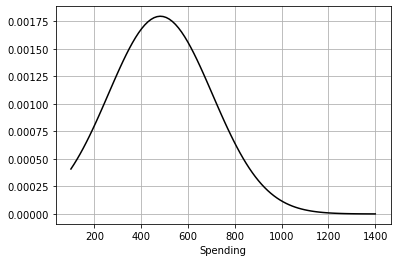

In [67]:
# Here, x2_min and x2_max denote the minimum and maximum values of the Spending variable.
# mean2 and std2 denote the mean and standard deviation of the Spending variable.
x2_min = 100
x2_max = 1400
mean2 = 482.016
std2 = 221.953805
x = np.linspace(x2_min, x2_max, 100)
y = scipy.stats.norm.pdf(x, mean2, std2)
plt.plot(x,y, color = 'Black')
plt.xlabel('Spending')
plt.grid()
plt.show()

In [60]:
# The Spending is showing a perfectly normal distribution until the value of 850.
# This shows that 68% of data fall between +/- 221.953 from the mean, 95% of data fall between +/- 443.906 from the mean and 99.7% of all the data fall between +/- 665.859 from the mean.
# It is clearly seen that the Spending distribution is a right tailed, or a positively skewed.

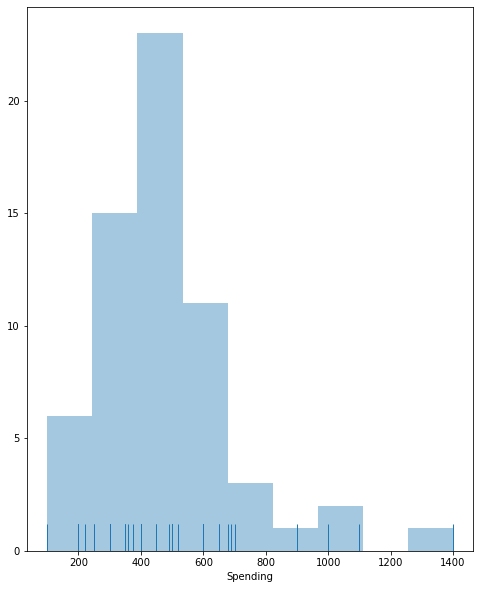

In [61]:
ax = plt.subplots(figsize = (8,10))
sns.distplot(df4['Spending'], kde = False, rug = True);

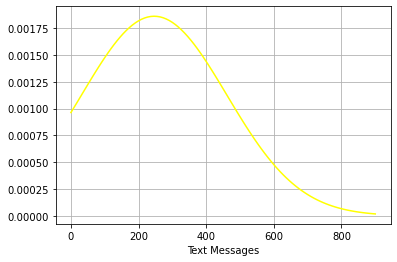

In [68]:
# Here, x3_min and x3_max denote the minimum and maximum values of the Text Messages variable.
# mean3 and std3 denote the mean and standard deviation of the Text Messages variable.
x3_min = 0
x3_max = 900
mean3 = 246.209677
std3 = 214.465950
x = np.linspace(x3_min, x3_max, 100)
y = scipy.stats.norm.pdf(x, mean3, std3)
plt.plot(x,y, color = 'Yellow')
plt.xlabel('Text Messages')
plt.grid()
plt.show()

In [63]:
# The Text Messages is showing a normal distribution until the first 500 counts.
# This shows that 68% of data fall between +/- 214.465 from the mean, 95% of data fall between +/- 428.93 from the mean and 99.7% of all the data fall between +/- 643.395 from the mean.
# The Text Messages ditribution is a fully right skewed or a right tailed distribution.

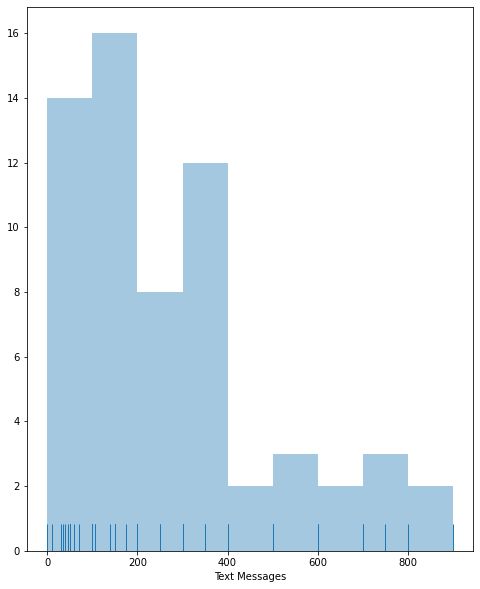

In [64]:
ax = plt.subplots(figsize = (8,10))
sns.distplot(df4['Text Messages'], kde = False, rug = True);

In [69]:
# Project 3:
import numpy as np
import pandas as pd
import math
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sm

In [70]:
sh = pd.read_csv('A & B shingles-1.csv')
sh

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [71]:
# 3.1: 
shingles_a = sh['A']

In [72]:
# Step 1: Defininng the Null and Alternative Hypothesis:
# The Null Hypothesis is that the mean moisture content of Column A is equal to or less than 0.35, H0: MuA =< 0.35
# The Alternative Hypothesis is that the mean moisture content of Column A is more than 0.35, HA: MuA > 0.35

In [73]:
# Step 2: Decide the significance level:
# Here we select alpha_level = 0.05

In [74]:
# Step 3: Identify the test Statistic:
# Here we do not know the population standard delivation and the sample size is 36 for Column A.
# So we use the t distribution and the t statistic 

In [75]:
# Step 4: Calculate the p-value and the test statistic:
t_statistic, p_value = ttest_1samp(shingles_a, 0.35)
print('One sample t-test \nt statistic: {0} p value: {1} '. format(t_statistic, p_value/2))
# Here we divide the p_value by 2 to get the p value for one tailed test.

One sample t-test 
t statistic: -1.4735046253382782 p value: 0.07477633144907513 


In [76]:
# Step 5: Decide to reject or accept the Null hypothesis:
alpha_value = 0.05
if (p_value/2 < alpha_value):
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance')

We have no evidence to reject the null hypothesis since p value > Level of significance


In [77]:
# Conclusion: The mean moisture content of column A in A & B Shingles is equal to or less than 0.35 at 95% confidence level.

In [78]:
shingles_b = sh['B']

In [79]:
# Step 1: Defininng the Null and Alternative Hypothesis:
# The Null Hypothesis is that the mean moisture content of Column B is equal to or less than 0.35, H0: MuA =< 0.35
# The Alternative Hypothesis is that the mean moisture content of Column B is more than 0.35, HA: MuA > 0.35

In [80]:
# Step 2: Decide the significance level:
# Here we select alpha_level = 0.05

In [81]:
# Step 3: Identify the test Statistic:
# Here we do not know the population standard delivation and the sample size is 31 for Column B.
# So we use the t distribution and the t statistic

In [82]:
# Step 4: Calculate the p-value and the test statistic:
t_statistic, p_value = ttest_1samp(shingles_b, 0.35, nan_policy = 'omit')
print('One sample t-test \nt statistic: {0} p value: {1} '. format(t_statistic, p_value/2))
# Here we divide the p_value by 2 to get the p value for one tailed test.

One sample t-test 
t statistic: -3.1003313069986995 p value: 0.0020904774003191826 


In [83]:
# Step 5: Decide to reject or accept the Null hypothesis:
alpha_value = 0.05
if (p_value/2 < alpha_value):
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance')

We have evidence to reject the null hypothesis since p value < Level of significance


In [84]:
# Conclusion: The mean moisture content of column B in A & B Shingles is more than 0.35 at 95% confidence level.

In [85]:
# 3.2: Part one: By considering all the rows in the columns of A and B in A & B Shingles-1
# Step 1: Define the null and the alternative hypothesis:
# The Null hypothesis states that the mean of column A is equal to the mean of column B, H0: MuA = MuB
# The Alternarive hypothesis states that the mean of column A is not equal to the mean of column B, HA: MuA != MuB 

In [86]:
# Step 2: Decide the significance level:
# Here we select alpha_level = 0.05

In [87]:
# Step 3: Identify the test Statistic:
# Here we do not know the population standard delivation and the sample size is not large.
# So we use the t distribution and the t statistic for two sample unpaired t-test. 

In [88]:
# Step 4: Calculate the p-value and the test statistic:
t_statistic, p_value = ttest_ind(sh['A'], sh['B'], nan_policy = 'omit')
print('t-statistic', t_statistic)
print('p value', p_value)

t-statistic 1.2896282719661123
p value 0.2017496571835306


In [89]:
# Step 5: Decide to reject or accept the Null hypothesis:
alpha_value = 0.05
if (p_value < alpha_value):
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
    print('The mean for column A is not equal to the mean of column B')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance')
    print('The mean of column A is equal to the mean of column B')

We have no evidence to reject the null hypothesis since p value > Level of significance
The mean of column A is equal to the mean of column B


In [90]:
#3.2: Part 2: To apply the unpaired t-test of two samples, the sample size needs to be the same. If we omit the nan values in column B of 
# A & B shingles-1, then the column size of column A is 36 and that of column B is 31, that is why tried to perform the t-test
#considering only the first 30 values of both the columns. 
# Steps 1 to 3 will remain the same in this case:
# Will first extract only the first 30 rows of column A and save it in shingles_a_extract:
shingles_a_extract = shingles_a.iloc[0:31]

In [91]:
#Step 4: Calculate the p-value and the test statistic:
t_statistic, p_value = ttest_ind(shingles_a_extract, shingles_b, nan_policy = 'omit')
print('t-statistic', t_statistic)
print('p value', p_value)

t-statistic 0.9852499778394412
p value 0.3284577916404774


In [92]:
# Step 5: Decide to reject or accept the Null hypothesis:
alpha_value = 0.05
if (p_value < alpha_value):
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
    print('The mean for column A is not equal to the mean of column B')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance')
    print('The mean of column A is equal to the mean of column B')

We have no evidence to reject the null hypothesis since p value > Level of significance
The mean of column A is equal to the mean of column B
